Eye tracking has been gaining in popularity over the past decade as a window into observers’ visual and cognitive processes. This project uses eye movement data from dyslexic kids to predict the possibility of dyslexia based on measured eye movements. The source for this data is available at https://doi.org/10.6084/m9.figshare.c.3521379.v1

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import mlab
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.stats import norm
labels = [1, 1, 0, 0] #1: Disabled
gender = [1,0,1,0] #1: Male

In [17]:
def drawConfusionMatrix(cnf_matrix):
    print(cnf_matrix)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Read the processed file with the features - the file contains one row per subject, 185 subjects and 52 features per subject. The data quality is pretty high. In the previous modules the data has been tested for the data to not cotain any missing values in any of the columns.

In [7]:
df = pd.read_csv('C:\Springboard\Springboard01\Capstone\Capstone 2\Data\datawithfeatures.csv')
print("Input Data Shape = ", df.shape)
df.head()

Input Data Shape =  (185, 53)


,DistanceL,DistanceR,Gender,Label,Subject,LTypeFSum,LTypeSSum,LTypeFCount,LTypeSCount,LTypeFMean,...,LVerDirNMean,RVerDirUSum,RVerDirDSum,RVerDirNSum,RVerDirUCount,RVerDirDCount,RVerDirNCount,RVerDirUMean,RVerDirDMean,RVerDirNMean
0,13413.296257,13580.306540,1,0,111GM3,15320.0,14520.0,171,172,89.590643,...,62.027027,11220.0,9900.0,8860.0,262,235,148,42.824427,42.127660,60.272109
1,8788.682167,8509.062191,0,1,111JA2,22100.0,17840.0,288,288,77.003484,...,43.737024,13740.0,13520.0,12680.0,324,317,302,42.407407,42.784810,41.986755
2,9765.357380,10281.893102,1,1,111RP1,24780.0,15180.0,239,240,103.682008,...,47.918367,14680.0,13300.0,11860.0,326,357,260,45.030675,37.254902,45.791506
3,11950.957324,11461.339153,1,0,112JU3,23920.0,15960.0,243,244,98.436214,...,46.666667,10600.0,13300.0,15980.0,270,360,329,39.259259,36.944444,48.719512
4,4959.743932,4913.022136,1,1,112KA1,29920.0,9760.0,249,249,120.645161,...,33.717579,12420.0,15920.0,11580.0,400,457,355,31.050000,34.912281,32.619718


**Dependent Variable**

The column **label** is the prediction column. This is the dependent variable. 0 is control group and 1 is dyslexic group. 

**Independent Variables**

There are 52 independent variables.All but gender are numerical/decimal variables. The **gender** column is a categorical variable and  has 1 for males and 0 for females

In [32]:
scaler = StandardScaler()
scaledData = print(X))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [8]:
df.groupby(by =['Label']).size()

Label
0    88
1    97
dtype: int64

The dataset has 88 subjects in the control group and 97 subjects in the dyslexic group.  This way the data seems to be very balanced. use StandardScaler to scale the variables to a standard normal format.

A training and validation approach is used. the available data is split with 70% of the data used for training the model and 30% of the data used to validate the model as the test data set. The dependent and independent variables are split into X_train and y_train for the training data set and X_test and y_test for the testing dataset. A stratified ratio preserved rows are split across the test and training data. The original data has a conrol/dyslexis ratio of (88/97) 90%, the training data has a ratio of (61/68) 90% and the test data has a ratio of (27/29) 93%.

In [55]:
X = df.drop(['Label', 'Subject'], axis=1)
X[:]= scaler.fit_transform(X[:])
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123, shuffle=True)
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')
print("Training Data", pd.concat([X_train, y_train], axis=1).groupby(by =['Label']).size())
print ("Test Data",pd.concat([X_test, y_test], axis=1).groupby(by =['Label']).size())

Training Data Label
0.0    61
1.0    68
dtype: int64
Test Data Label
0.0    27
1.0    29
dtype: int64


Now to find the hyperparameters for a logistic regression model, we try with different C values, 1000 through 0.001. Looking at the results a C value of 10 provides the best training and test accuracy.

In [76]:
C = [1000, 100, 10, 5, 1, .1, .001]
    
print ("-----------------  using liblinear and L1 penalty ------------------------")
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')
    C = [1000, 100, 10, 5, 1, .1, .001]
    
print( "-----------------  using liblinear and L2 penalty ------------------------")
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')
    C = [1000, 100, 10, 5, 1, .1, .001]
    
print ("-----------------  using lbfgs ------------------------")

for c in C:
    clf = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

-----------------  using liblinear and L1 penalty ------------------------
C: 1000
Training accuracy: 1.0
Test accuracy: 0.8571428571428571

C: 100
Training accuracy: 1.0
Test accuracy: 0.875

C: 10
Training accuracy: 1.0
Test accuracy: 0.9285714285714286

C: 5
Training accuracy: 0.9844961240310077
Test accuracy: 0.9107142857142857

C: 1
Training accuracy: 0.9689922480620154
Test accuracy: 0.875

C: 0.1
Training accuracy: 0.9224806201550387
Test accuracy: 0.875

C: 0.001
Training accuracy: 0.4728682170542636
Test accuracy: 0.48214285714285715

-----------------  using liblinear and L2 penalty ------------------------
C: 1000
Training accuracy: 1.0
Test accuracy: 0.8571428571428571

C: 100
Training accuracy: 1.0
Test accuracy: 0.8928571428571429

C: 10
Training accuracy: 0.9844961240310077
Test accuracy: 0.8928571428571429

C: 5
Training accuracy: 0.9844961240310077
Test accuracy: 0.8928571428571429

C: 1
Training accuracy: 0.9689922480620154
Test accuracy: 0.9107142857142857

C: 0.1
Tr

We try to fit a Logistic regression model with a regularization parameter (C) of 10 and a maximum of 500 iterations. Then test the model using predictions from the test data set.  We prepare and print the classification report for the training and test data.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92        27
         1.0       0.90      0.97      0.93        29

    accuracy                           0.93        56
   macro avg       0.93      0.93      0.93        56
weighted avg       0.93      0.93      0.93        56

[[24  3]
 [ 1 28]]


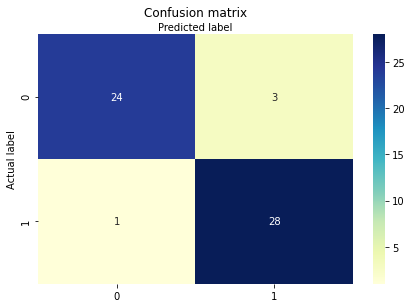

In [75]:
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, C=10).fit(X_train, y_train)
y_pred = model.predict(X_test)
y_predtrain = model.predict(X_train)
print(classification_report(y_train, y_predtrain)) 
print(classification_report(y_test, y_pred))
drawConfusionMatrix(confusion_matrix(y_test, y_pred))  

Now trying with the Gradient Boosting Classifier, to see if there are any better results.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GBMmodel = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred = GBMmodel.predict(X_test)
y_predtrain = GBMmodel.predict(X_train)
print(classification_report(y_train, y_predtrain)) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        61
         1.0       1.00      1.00      1.00        68

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        27
         1.0       0.80      0.83      0.81        29

    accuracy                           0.80        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.80      0.80      0.80        56



It looks like the linear regression with solver = liblinear and L1 penalty provides the best results